In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [7]:
df = pd.read_csv('healthcare_dataset.csv')
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


In [8]:
df = df[df['Test Results'] != 'Inconclusive']


In [9]:
df['Test Results'].value_counts()

Test Results
Abnormal    3456
Normal      3267
Name: count, dtype: int64

In [10]:
df.shape

(6723, 15)

In [11]:
df.isna().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

# **EDA**

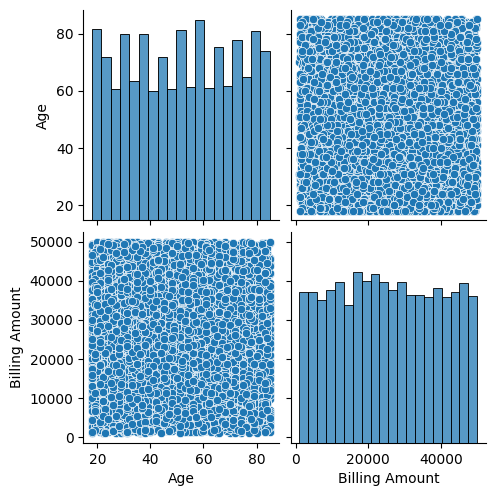

In [12]:
# Pairplot for numeric features
numeric_features = ['Age', 'Billing Amount']
sns.pairplot(df[numeric_features])
plt.show()

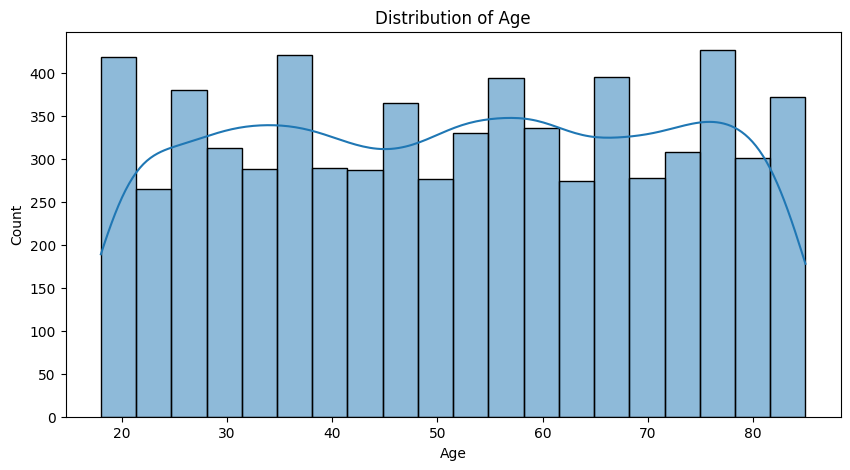

In [13]:
# Distribution of Age
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], bins=20, kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

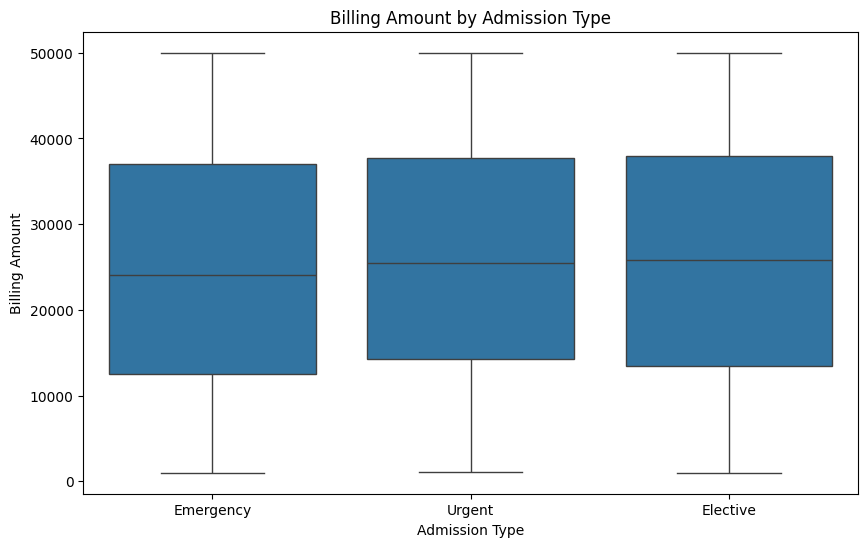

In [14]:
# Boxplot of Billing Amount by Admission Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Admission Type', y='Billing Amount', data=df)
plt.xlabel('Admission Type')
plt.ylabel('Billing Amount')
plt.title('Billing Amount by Admission Type')
plt.show()

# Feature Engineering 

In [15]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])
df['Length of Stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days
df[[ 'Length of Stay']]

,Length of Stay
1,14
2,30
3,1
4,24
5,3
...,...
9995,4
9996,23
9997,14
9998,20


In [16]:
# feature Engineering 
# not needed columns - [Name, Date, Doctor, Hospital, amount, room, discharge]
data = df[[ 'Age', 'Gender','Blood Type', 'Medical Condition','Admission Type','Insurance Provider', 'Medication', 'Test Results']]
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Length of Stay
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal,14
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal,30
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal,1
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal,24
5,Patrick Parker,41,Male,AB+,Arthritis,2020-08-20,Robin Green,Boyd PLC,Aetna,22522.363385,180,Urgent,2020-08-23,Aspirin,Abnormal,3


In [17]:
# Define age group intervals and labels
bins = [0, 30, 50, 70, 100]  # Age group intervals
labels = ['Under 30', '31-50', '51-70', 'Over 70']  # Labels for age groups

# Add a new column 'Age Group' based on age intervals
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

df[['Age', 'Age Group']]

,Age,Age Group
1,35,31-50
2,61,51-70
3,49,31-50
4,51,51-70
5,41,31-50
...,...,...
9995,83,Over 70
9996,47,31-50
9997,54,51-70
9998,84,Over 70


### Number of uniques values

In [18]:
for col in df.columns:
    print(col, df[col].nunique())

Name 6411
Age 68
Gender 2
Blood Type 8
Medical Condition 6
Date of Admission 1777
Doctor 6453
Hospital 5968
Insurance Provider 5
Billing Amount 6723
Room Number 400
Admission Type 3
Discharge Date 1787
Medication 5
Test Results 2
Length of Stay 30
Age Group 4


In [19]:
average_billing_per_doctor = df.groupby('Doctor')['Billing Amount'].mean()
print(average_billing_per_doctor)

Doctor
Aaron Barrera       17930.808495
Aaron Brewer        38698.632541
Aaron Brown         19455.289654
Aaron Burnett       37421.296660
Aaron Cameron MD    20216.305804
                        ...     
Zachary Turner      46295.820395
Zachary Walker      17528.856491
Zachary Wong        13730.432921
Zoe Cunningham       4074.530633
Zoe Garza           38099.997517
Name: Billing Amount, Length: 6453, dtype: float64


### Label encoding

In [20]:
age_bins = [0, 20, 40, 60, 80, float('inf')]
age_labels = ['0-20', '21-40', '41-60', '61-80', '81+']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Length of Stay,Age Group
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal,14,21-40
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal,30,61-80
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal,1,41-60
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal,24,41-60
5,Patrick Parker,41,Male,AB+,Arthritis,2020-08-20,Robin Green,Boyd PLC,Aetna,22522.363385,180,Urgent,2020-08-23,Aspirin,Abnormal,3,41-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,James Hood,83,Male,A+,Obesity,2022-07-29,Samuel Moody,"Wood, Martin and Simmons",UnitedHealthcare,39606.840083,110,Elective,2022-08-02,Ibuprofen,Abnormal,4,81+
9996,Stephanie Evans,47,Female,AB+,Arthritis,2022-01-06,Christopher Yates,Nash-Krueger,Blue Cross,5995.717488,244,Emergency,2022-01-29,Ibuprofen,Normal,23,41-60
9997,Christopher Martinez,54,Male,B-,Arthritis,2022-07-01,Robert Nicholson,Larson and Sons,Blue Cross,49559.202905,312,Elective,2022-07-15,Ibuprofen,Normal,14,41-60
9998,Amanda Duke,84,Male,A+,Arthritis,2020-02-06,Jamie Lewis,Wilson-Lyons,UnitedHealthcare,25236.344761,420,Urgent,2020-02-26,Penicillin,Normal,20,81+


In [21]:
variables_to_remove = ['Name','Date of Admission','Hospital','Room Number','Discharge Date','Doctor','Age']

df = df.drop(variables_to_remove, axis=1)
df

,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Medication,Test Results,Length of Stay,Age Group
1,Male,O+,Asthma,UnitedHealthcare,47304.064845,Emergency,Lipitor,Normal,14,21-40
2,Male,B-,Obesity,Medicare,36874.896997,Emergency,Lipitor,Normal,30,61-80
3,Male,B-,Asthma,Medicare,23303.322092,Urgent,Penicillin,Abnormal,1,41-60
4,Male,O-,Arthritis,UnitedHealthcare,18086.344184,Urgent,Paracetamol,Normal,24,41-60
5,Male,AB+,Arthritis,Aetna,22522.363385,Urgent,Aspirin,Abnormal,3,41-60
...,...,...,...,...,...,...,...,...,...,...
9995,Male,A+,Obesity,UnitedHealthcare,39606.840083,Elective,Ibuprofen,Abnormal,4,81+
9996,Female,AB+,Arthritis,Blue Cross,5995.717488,Emergency,Ibuprofen,Normal,23,41-60
9997,Male,B-,Arthritis,Blue Cross,49559.202905,Elective,Ibuprofen,Normal,14,41-60
9998,Male,A+,Arthritis,UnitedHealthcare,25236.344761,Urgent,Penicillin,Normal,20,81+


In [22]:
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col]=lc.fit_transform(df[col])

df['Age Group'] = lc.fit_transform(df['Age Group'])
df.head()

,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Medication,Test Results,Length of Stay,Age Group
1,1,6,1,4,47304.064845,1,2,1,14,1
2,1,5,5,3,36874.896997,1,2,1,30,3
3,1,5,1,3,23303.322092,2,4,0,1,2
4,1,7,0,4,18086.344184,2,3,1,24,2
5,1,2,0,0,22522.363385,2,0,0,3,2


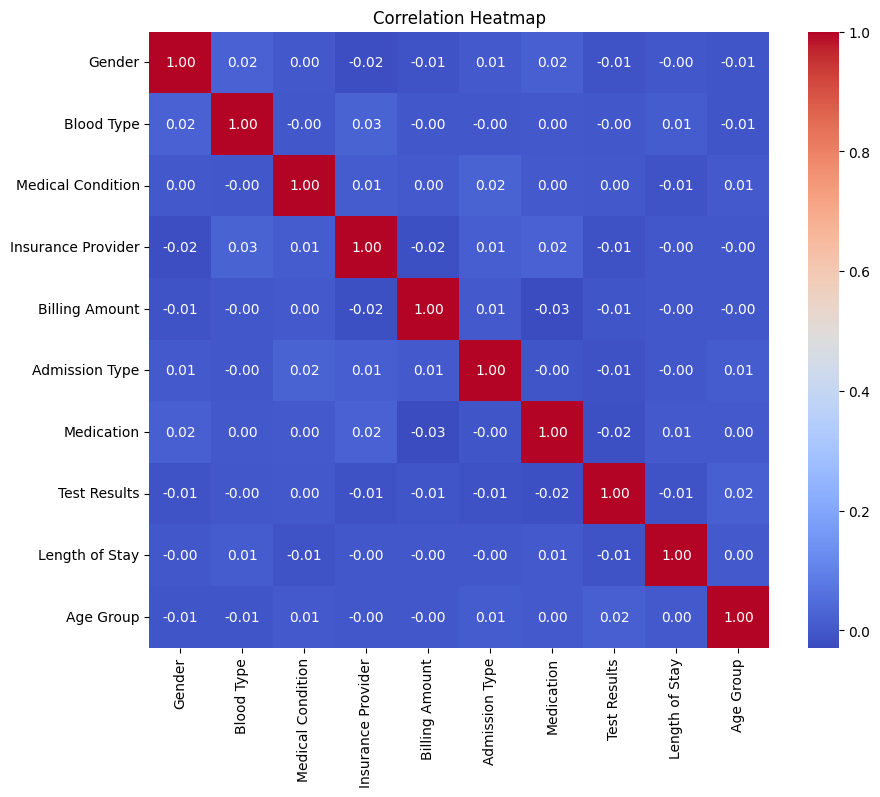

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [24]:
df

,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Medication,Test Results,Length of Stay,Age Group
1,1,6,1,4,47304.064845,1,2,1,14,1
2,1,5,5,3,36874.896997,1,2,1,30,3
3,1,5,1,3,23303.322092,2,4,0,1,2
4,1,7,0,4,18086.344184,2,3,1,24,2
5,1,2,0,0,22522.363385,2,0,0,3,2
...,...,...,...,...,...,...,...,...,...,...
9995,1,0,5,4,39606.840083,0,1,0,4,4
9996,0,2,0,1,5995.717488,1,1,1,23,2
9997,1,5,0,1,49559.202905,0,1,1,14,2
9998,1,0,0,4,25236.344761,2,4,1,20,4


Model fitting

In [25]:
X,y=df.drop(['Test Results'],axis=1), df['Test Results']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [26]:
X_train.shape, y_test.shape

((5378, 9), (1345,))

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.4988847583643123
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.57      0.54       680
           1       0.49      0.42      0.46       665

    accuracy                           0.50      1345
   macro avg       0.50      0.50      0.50      1345
weighted avg       0.50      0.50      0.50      1345



In [35]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svc_model = SVC()

svc_model.fit(X_train, y_train)

y_pred = svc_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


Accuracy: 0.5055762081784386
Classification Report:
              precision    recall  f1-score   support

           0       0.51      1.00      0.67       680
           1       0.00      0.00      0.00       665

    accuracy                           0.51      1345
   macro avg       0.25      0.50      0.34      1345
weighted avg       0.26      0.51      0.34      1345



c:\Users\veerapsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\veerapsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\veerapsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

In [29]:

y = df['Test Results']  
X = df.drop(columns=['Test Results']) 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


logistic_regression = LogisticRegression()

logistic_regression.fit(X_train, y_train)

y_pred = logistic_regression.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


c:\Users\veerapsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5003717472118959

In [30]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.50
              precision    recall  f1-score   support

           0       0.51      0.54      0.52       680
           1       0.50      0.46      0.48       665

    accuracy                           0.50      1345
   macro avg       0.50      0.50      0.50      1345
weighted avg       0.50      0.50      0.50      1345

[[367 313]
 [356 309]]
